# MCB 198: Final Project
Submitted by: Ilia Gelfat

In [1]:
import numpy as np
import keras as kr
import matplotlib.pyplot as plt
from google.colab import files
import re

Using TensorFlow backend.


In [0]:
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D
from keras import layers
from keras import models
from keras.utils import np_utils

## Import data

Nucleotide binding proteins

In [3]:
nucFile = files.upload()     # select 'NUC.txt' from file selection prompt

Saving NUC.txt to NUC.txt


In [0]:
with open('NUC.txt', 'r') as sequences:
    data = re.split(r'\s', sequences.read())
aaNUC = []
for i in range(len(data)): 
  if len(data[i]) > 10 and len(data[i]) <= 1000:      # remove sequence UniProt ID and empty spaces, as well as long sequences (>1000aa)
    if ('B' not in data[i]) and ('J' not in data[i]) and ('O' not in data[i]) and ('U' not in data[i]) and ('X' not in data[i]) and ('Z' not in data[i]):
      aaNUC.append(data[i])
aaNUC = list(set(aaNUC))     # remove duplicates

Peptide binding proteins

In [5]:
pepFile = files.upload()     # select 'III.txt' from file selection prompt

Saving III.txt to III.txt


In [0]:
with open('III.txt', 'r') as sequences:
    data = re.split(r'\s', sequences.read())
aaPEP = []
for i in range(len(data)): 
  if len(data[i]) > 10 and len(data[i]) <= 1000:      # remove sequence UniProt ID and empty spaces, as well as long sequences (>1000aa)
    if ('B' not in data[i]) and ('J' not in data[i]) and ('O' not in data[i]) and ('U' not in data[i]) and ('X' not in data[i]) and ('Z' not in data[i]):
      aaPEP.append(data[i])
aaPEP = list(set(aaPEP))     # remove duplicates

Sugar binding proteins (glucose, galactose, fucose, beta-D-glucose, mannose)

In [7]:
glcFile = files.upload()     # select 'GLC.txt' from file selection prompt
galFile = files.upload()     # select 'GAL.txt' from file selection prompt
fucFile = files.upload()     # select 'FUC.txt' from file selection prompt
bgcFile = files.upload()     # select 'BGC.txt' from file selection prompt
manFile = files.upload()     # select 'MAN.txt' from file selection prompt

Saving GLC.txt to GLC.txt


Saving GAL.txt to GAL.txt


Saving FUC.txt to FUC.txt


Saving BGC.txt to BGC.txt


Saving MAN.txt to MAN.txt


In [0]:
aaSUGAR = []
data = []
sugarFileList = ['GLC.txt', 'GAL.txt', 'FUC.txt', 'BGC.txt', 'MAN.txt']

for filename in sugarFileList: 
  with open(filename, 'r') as sequences:
      data.extend(re.split(r'\s', sequences.read()))
for i in range(len(data)): 
  if len(data[i]) > 10 and len(data[i]) <= 1000:      # remove sequence UniProt ID and empty spaces, as well as long sequences (>1000aa)
    if ('B' not in data[i]) and ('J' not in data[i]) and ('O' not in data[i]) and ('U' not in data[i]) and ('X' not in data[i]) and ('Z' not in data[i]):
      aaSUGAR.append(data[i])

aaSUGAR = list(set(aaSUGAR))     # remove duplicates

In [9]:
print('Database size:')
print('Nucleodtide binding proteins: {}'.format(len(aaNUC)))
print('Peptide binding proteins: {}'.format(len(aaPEP)))
print('Sugar binding proteins: {}'.format(len(aaSUGAR)))

Database size:
Nucleodtide binding proteins: 2380
Peptide binding proteins: 2248
Sugar binding proteins: 904


## Reformat data to match neural network input

Pad with zeros to match lengths of AA sequences

In [10]:
maxLen = 0
minLen = 1000
xcount = 0
ch = 'Z'
for seq in aaNUC: 
  if len(seq) > maxLen: 
    maxLen = len(seq)
  if len(seq) < minLen: 
    minLen = len(seq)
  if ch in seq:
    xcount += 1
print('X count in aaNUC: {}'.format(xcount))
print('The minimal sequence length in aaNUC: {}'.format(minLen))
minLen = 1000
xcount = 0
for seq in aaPEP: 
  if len(seq) > maxLen: 
    maxLen = len(seq)
  if len(seq) < minLen: 
    minLen = len(seq)
  if ch in seq:
    xcount += 1
print('X count in aaPEP: {}'.format(xcount))
print('The minimal sequence length in aaPEP: {}'.format(minLen))
minLen = 1000
xcount = 0
for seq in aaSUGAR: 
  if len(seq) > maxLen: 
    maxLen = len(seq)
  if len(seq) < minLen: 
    minLen = len(seq)
  if ch in seq:
    xcount += 1
print('X count in aaSUGAR: {}'.format(xcount))
print('The minimal sequence length in aaSUGAR: {}'.format(minLen))
print('The maximal sequence length: {}'.format(maxLen))

X count in aaNUC: 0
The minimal sequence length in aaNUC: 37
X count in aaPEP: 0
The minimal sequence length in aaPEP: 35
X count in aaSUGAR: 0
The minimal sequence length in aaSUGAR: 30
The maximal sequence length: 1000


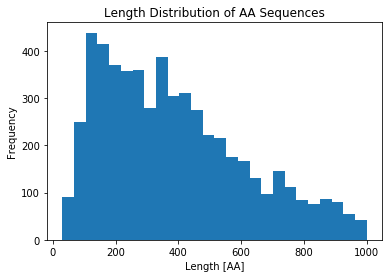

In [11]:
full = []
full.extend(aaNUC)
full.extend(aaPEP)
full.extend(aaSUGAR)
lengths = []
for seq in full: 
  lengths.append(len(seq))
a = np.hstack(lengths)
plt.hist(a, bins='auto')
plt.title('Length Distribution of AA Sequences')
plt.xlabel('Length [AA]')
plt.ylabel('Frequency')
plt.show()

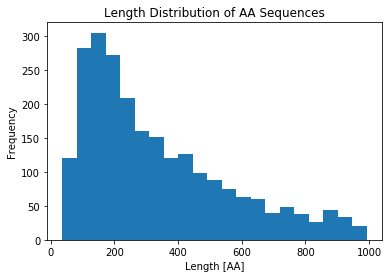

In [12]:
lengths = []
for seq in aaNUC: 
  lengths.append(len(seq))
a = np.hstack(lengths)
plt.hist(a, bins='auto')
plt.title('Length Distribution of AA Sequences')
plt.xlabel('Length [AA]')
plt.ylabel('Frequency')
plt.show()

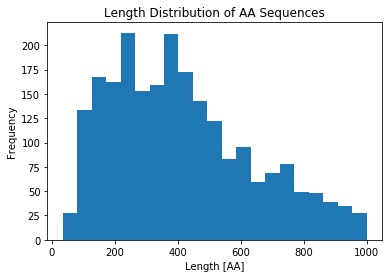

In [13]:
lengths = []
for seq in aaPEP: 
  lengths.append(len(seq))
a = np.hstack(lengths)
plt.hist(a, bins='auto')
plt.title('Length Distribution of AA Sequences')
plt.xlabel('Length [AA]')
plt.ylabel('Frequency')
plt.show()

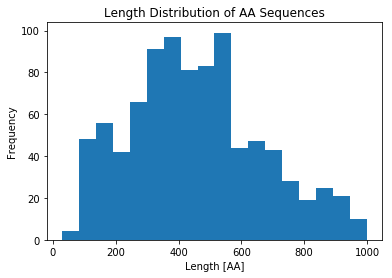

In [14]:
lengths = []
for seq in aaSUGAR: 
  lengths.append(len(seq))
a = np.hstack(lengths)
plt.hist(a, bins='auto')
plt.title('Length Distribution of AA Sequences')
plt.xlabel('Length [AA]')
plt.ylabel('Frequency')
plt.show()

The three "channels" - hydrophobicity, isoelectric point (pI) and molecular weight (MW). The values were shifted and normalized to span the range of 0.1 - 1. The minimum was set as 0.1 and not 0, to differentiate it from the zeros added to the ends of the sequences in order to make the inputs the same length. 

In [0]:
AAstr = 'ACDEFGHIKLMNPQRSTVWY'
AAhydrophobicity = np.asarray([1.8, 2.5, -3.5, -3.5, 2.8, -0.4, -3.2, 4.5, -3.9, 3.8, 1.9, -3.5, -1.6, -3.5, -4.5, -0.8, -0.7, 4.2, -0.9, -1.3]) + 4.5
AAhydrophobicity += max(AAhydrophobicity) / 9
AAhydrophobicity /= max(AAhydrophobicity)
AApI = np.asarray([6.11, 5.02, 2.87, 3.08, 5.91, 6.06, 7.64, 6.04, 9.47, 6.04, 5.74, 5.41, 6.3, 5.65, 10.76, 5.68, 5.6, 6.02, 5.88, 5.63]) - 2.87
AApI += max(AApI) / 9
AApI /= max(AApI)
AAMW = np.asarray([89.1, 121.2, 133.1, 147.1, 165.2, 75.1, 155.2, 131.2, 146.2, 131.2, 149.2, 132.1, 115.1, 146.2, 174.2, 105.1, 119.1, 117.1, 204.2, 181.2]) - 75.1
AAMW += max(AAMW) / 9
AAMW /= max(AAMW)
AAproperties = np.asarray([AAhydrophobicity, AApI, AAMW]).transpose()
AAdict = dict(zip(AAstr, AAproperties))

***Training output form: ***

Nucleic acid binding = [1, 0, 0]

Peptide binding = [0, 1, 0]

Sugar binding = [0, 0, 1]

In [0]:
L = len(aaNUC)
x_NUC = np.zeros((L, 3, 1000))
for i in range(L): 
  seq = aaNUC[i]
  for k in range(len(seq)): 
    x_NUC[i][:, k] = AAdict[seq[k]]
y_NUC = np.concatenate((np.ones((1, L)), np.zeros((1, L)), np.zeros((1, L))), axis=0)
y_NUC = y_NUC.transpose()

In [0]:
L = len(aaPEP)
x_PEP= np.zeros((L, 3, 1000))
for i in range(L): 
  seq = aaPEP[i]
  for k in range(len(seq)): 
    x_PEP[i][:, k] = AAdict[seq[k]]
y_PEP = np.concatenate((np.zeros((1, L)), np.ones((1, L)), np.zeros((1, L))), axis=0)
y_PEP = y_PEP.transpose()

In [0]:
L = len(aaSUGAR)
x_SUGAR = np.zeros((L, 3, 1000))
for i in range(L): 
  seq = aaSUGAR[i]
  for k in range(len(seq)): 
    x_SUGAR[i][:, k] = AAdict[seq[k]]
y_SUGAR = np.concatenate((np.zeros((1, L)), np.zeros((1, L)), np.ones((1, L))), axis=0)
y_SUGAR = y_SUGAR.transpose()

In [0]:
N_TOTAL = len(aaNUC) + len(aaPEP) + len(aaSUGAR)
X = np.concatenate((x_NUC, x_PEP, x_SUGAR), axis=0)
X = X.astype('float32')
X_new = np.zeros((N_TOTAL, 1000, 3))
for i in range(N_TOTAL): 
  X_new[i] = X[i].transpose()
Y = np.concatenate((y_NUC, y_PEP, y_SUGAR), axis=0)

Shuffle the data

In [0]:
XY = np.c_[X.reshape(len(X), -1), Y.reshape(len(Y), -1)]
np.random.shuffle(XY)
X_sh = XY[:, :X.size//len(X)].reshape(X.shape)
Y_sh = XY[:, X.size//len(X):].reshape(Y.shape)

In [34]:
X_sh[0]

array([[0.74000001, 0.82999998, 0.73000002, ..., 0.        , 0.        ,
        0.        ],
       [0.42737642, 0.44676808, 0.46958175, ..., 0.        , 0.        ,
        0.        ],
       [0.61657631, 0.72811776, 0.19759876, ..., 0.        , 0.        ,
        0.        ]])

## Train neural network using Keras Sequential model

In [36]:
NN = Sequential()
NN.add(Dense(500, input_shape=(3,1000), activation='relu'))
NN.add(Flatten())
NN.add(Dense(100, activation='relu'))
NN.add(Dense(50, activation='relu'))
NN.add(Dense(3, activation='softmax'))
NN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 3, 500)            500500    
_________________________________________________________________
flatten_2 (Flatten)          (None, 1500)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               150100    
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 153       
Total params: 655,803
Trainable params: 655,803
Non-trainable params: 0
_________________________________________________________________


In [37]:
NN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = NN.fit(X_sh, Y_sh, 
                 epochs=100,
                 validation_split=0.2)

Train on 4425 samples, validate on 1107 samples
Epoch 1/100
4425/4425 [==============================] - 3s 727us/step - loss: 0.5896 - acc: 0.6789 - val_loss: 0.5635 - val_acc: 0.7010
Epoch 2/100
4425/4425 [==============================] - 3s 707us/step - loss: 0.5587 - acc: 0.7017 - val_loss: 0.5499 - val_acc: 0.7076
Epoch 3/100
4425/4425 [==============================] - 3s 746us/step - loss: 0.5159 - acc: 0.7367 - val_loss: 0.5514 - val_acc: 0.7055
Epoch 4/100
4425/4425 [==============================] - 3s 752us/step - loss: 0.4737 - acc: 0.7666 - val_loss: 0.5441 - val_acc: 0.7245
Epoch 5/100
4425/4425 [==============================] - 3s 741us/step - loss: 0.4279 - acc: 0.7931 - val_loss: 0.5645 - val_acc: 0.7154
Epoch 6/100
4425/4425 [==============================] - 3s 765us/step - loss: 0.3843 - acc: 0.8275 - val_loss: 0.6022 - val_acc: 0.7142
Epoch 7/100
4425/4425 [==============================] - 3s 732us/step - loss: 0.3455 - acc: 0.8495 - val_loss: 0.6161 - val_acc: 

## Train convolutional neural network

In [51]:
X_cnn = np.transpose(X_sh, (0, 2, 1))
X_cnn[0]

array([[0.74000001, 0.42737642, 0.61657631],
       [0.82999998, 0.44676808, 0.72811776],
       [0.73000002, 0.46958175, 0.19759876],
       ...,
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ]])

In [55]:
CNN = Sequential()
CNN.add(Conv1D(100, 50, padding='same', activation='relu', input_shape=(1000,3)))
CNN.add(Conv1D(100, 10, padding='same', activation='relu'))
CNN.add(MaxPooling1D(3))
CNN.add(Conv1D(100, 10, padding='same', activation='relu'))
CNN.add(GlobalAveragePooling1D())
CNN.add(Dropout(0.5))
CNN.add(Dense(3, activation='softmax'))
CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 1000, 100)         15100     
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 1000, 100)         100100    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 333, 100)          0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 333, 100)          100100    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 100)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 303       
Total para

In [56]:
CNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history_c = CNN.fit(X_cnn, Y_sh, 
                    epochs=100,
                    validation_split=0.2)

Train on 4425 samples, validate on 1107 samples
Epoch 1/100
4425/4425 [==============================] - 120s 27ms/step - loss: 0.6041 - acc: 0.6647 - val_loss: 0.5917 - val_acc: 0.6667
Epoch 2/100
4425/4425 [==============================] - 119s 27ms/step - loss: 0.5954 - acc: 0.6736 - val_loss: 0.5831 - val_acc: 0.6917
Epoch 3/100
4425/4425 [==============================] - 118s 27ms/step - loss: 0.5931 - acc: 0.6765 - val_loss: 0.5772 - val_acc: 0.6986
Epoch 4/100
4425/4425 [==============================] - 118s 27ms/step - loss: 0.5888 - acc: 0.6826 - val_loss: 0.5872 - val_acc: 0.6676
Epoch 5/100
4425/4425 [==============================] - 116s 26ms/step - loss: 0.5785 - acc: 0.6890 - val_loss: 0.5503 - val_acc: 0.7085
Epoch 6/100
4425/4425 [==============================] - 122s 28ms/step - loss: 0.5604 - acc: 0.6956 - val_loss: 0.5677 - val_acc: 0.6929
Epoch 7/100
4425/4425 [==============================] - 121s 27ms/step - loss: 0.5507 - acc: 0.6988 - val_loss: 0.5304 - va